# Students performance analysis using Logistic Regression
In this project I'm going to perform some exploratory analysis on Students performance data downloaded from "thecleverprogrammer.com" and applying a logistic regression and a random forest model to the dataset.

This dataset presents data on students participating in a school exam divided into math, reading and writing. The students are categorized by gender, race/ethnicity, level of education of their parents, lunch type and whether they attended a test preparation course.

Let's install some packages and read the data.

In [2]:
%pip install seaborn
%pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

## Exploratory Data Analysis and preparation
Let's get to know the dataframe:

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

As we can see, the data is divided in groups as follows:
* gender: female, male
* race/ethnicity: group A, group B, group C, group D, group E
* Parental level of education: bachelor's degree, some college, master's degree, associate's degree, high school, some high school
* lunch: free/reduced, standard
* test preparation course: completed, none

Le'ts check the missing data percentage for each column:

In [7]:
missing_data_perc = data.isnull().sum()/data.shape[0]
print(missing_data_perc)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


### Some plots
Let's start by seeing how test scores are related to one another:

<AxesSubplot:xlabel='math score', ylabel='reading score'>

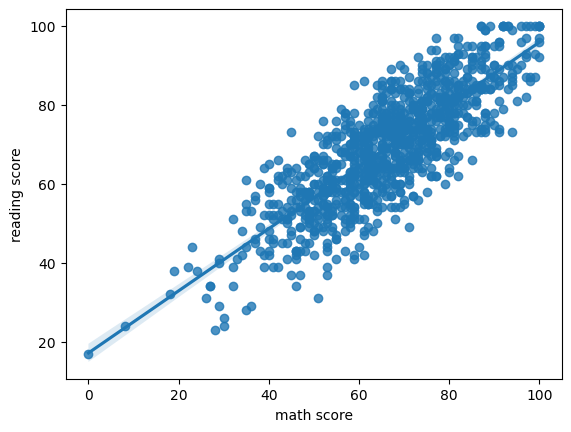

In [8]:
#reading score/math score correlation
sns.regplot(x="math score", y="reading score", data=data)

<AxesSubplot:xlabel='math score', ylabel='writing score'>

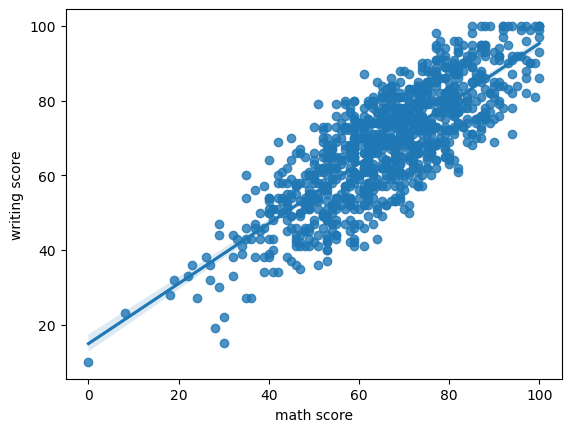

In [9]:
#writing score/math score
sns.regplot(x="math score", y="writing score", data=data)

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

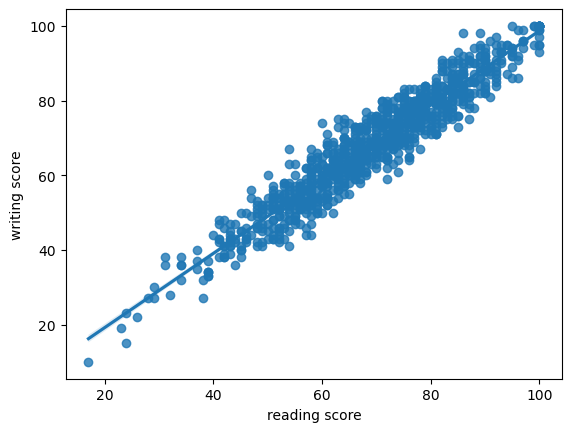

In [10]:
#writing score/reading score
sns.regplot(x="reading score", y="writing score", data=data)

As we can see, scores seem to be pretty strongly correlated to one another, with reading/writing having the least dispersion.

Let's also check what is the distribution of each score:

Text(0, 0.5, 'Count')

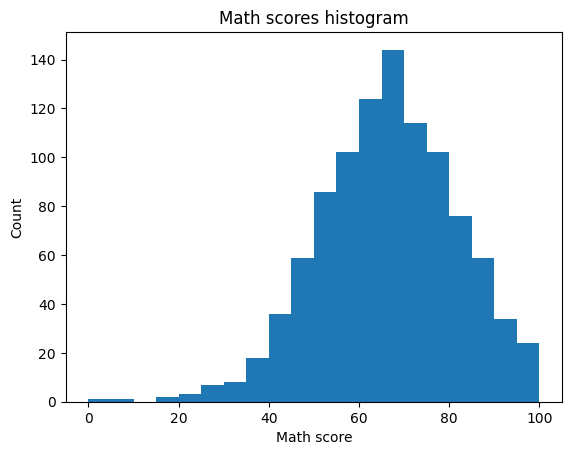

In [11]:
plt.hist(data["math score"], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.title("Math scores histogram")
plt.xlabel("Math score")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

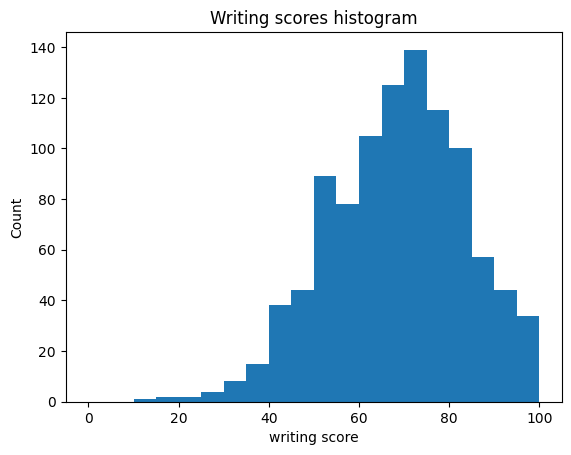

In [12]:
plt.hist(data["writing score"], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.title("Writing scores histogram")
plt.xlabel("writing score")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

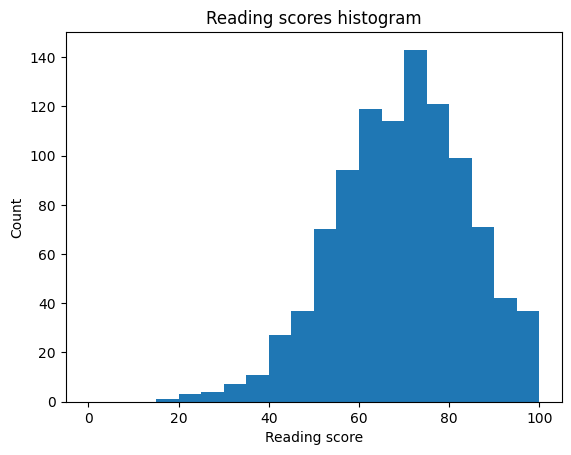

In [13]:
plt.hist(data["reading score"], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.title("Reading scores histogram")
plt.xlabel("Reading score")
plt.ylabel("Count")

As one would assume, these histograms seem to follow pretty closely a normal curve cut at 100. 

### Some statistics about scores
Let's see whether lunch or participation to the preparation course had any influence on the test scores:

In [14]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [15]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

As we can see, standard lunch and completing the preparation course seem to have an effect in terms of exam scores, with females having up to a 10 point difference in math between lunch type and males having up to a 10 point increase in writing scores when participating in the preparation course

Another interesting question is whether gender or ethnicity have any relevance to test results.

In [16]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['gender']).agg('median')

<ipython-input-16-326622b83a40>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'reading score']].groupby(['gender']).agg('median')


,math score,writing score,reading score
gender,,,
female,65.0,74.0,73.0
male,69.0,64.0,66.0


In [17]:
data[['test preparation course',
      'gender',
      'race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

<ipython-input-17-eee853eda861>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'reading score']].groupby(['race/ethnicity']).agg('median')


,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


Gender seems to play a complex role, with female having higher writing and reading scores while male have slightly higher math scores.

Race/ethnicity seems to show that students in group E perform better than their colleagues across the board.

But what about parental level of education?

In [18]:
data[['test preparation course',
      'gender',
      'race/ethnicity',
      'math score',
      'writing score',
      'parental level of education',
      'reading score']].groupby(['parental level of education']).agg('median')

<ipython-input-18-4a6e33542336>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'reading score']].groupby(['parental level of education']).agg('median')


,math score,writing score,reading score
parental level of education,,,
associate's degree,67.0,70.5,72.5
bachelor's degree,68.0,74.0,73.0
high school,63.0,64.0,66.0
master's degree,73.0,75.0,76.0
some college,67.5,70.0,70.5
some high school,65.0,66.0,67.0


This data is much harder to grasp at first glance. The only standouts seem to be that students with parents with a master's degree seem to perform marginally better, whereas students with parents having high school or some high school are more likely to score lower. Let's see a box plot to verify our hipothesis.

<ipython-input-19-f005fc8df814>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'reading score']].groupby(['parental level of education']).agg('median').transpose()


Text(0.5, 1.0, 'Parental education VS score')

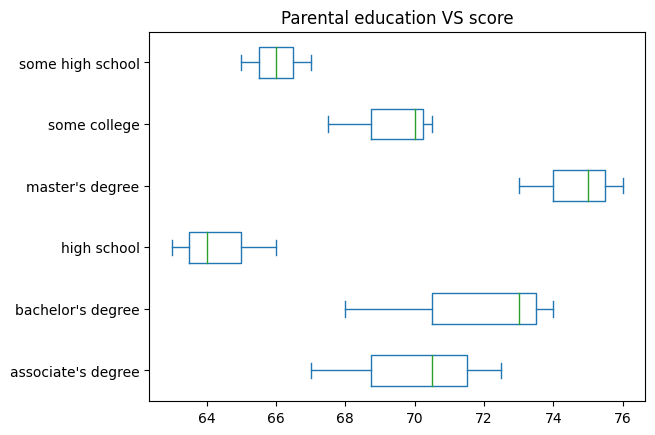

In [19]:
data_box = data[['test preparation course',
      'gender',
      'race/ethnicity',
      'math score',
      'writing score',
      'parental level of education',
      'reading score']].groupby(['parental level of education']).agg('median').transpose()

data_box.plot(kind="box", vert=False)
plt.title("Parental education VS score")

Whilst not completely exhaustive, this plot shows us that our assumption, on average, works quite well when we take into consideration all three exams.

Let's check how the students scored, on average, across the three exam parts.

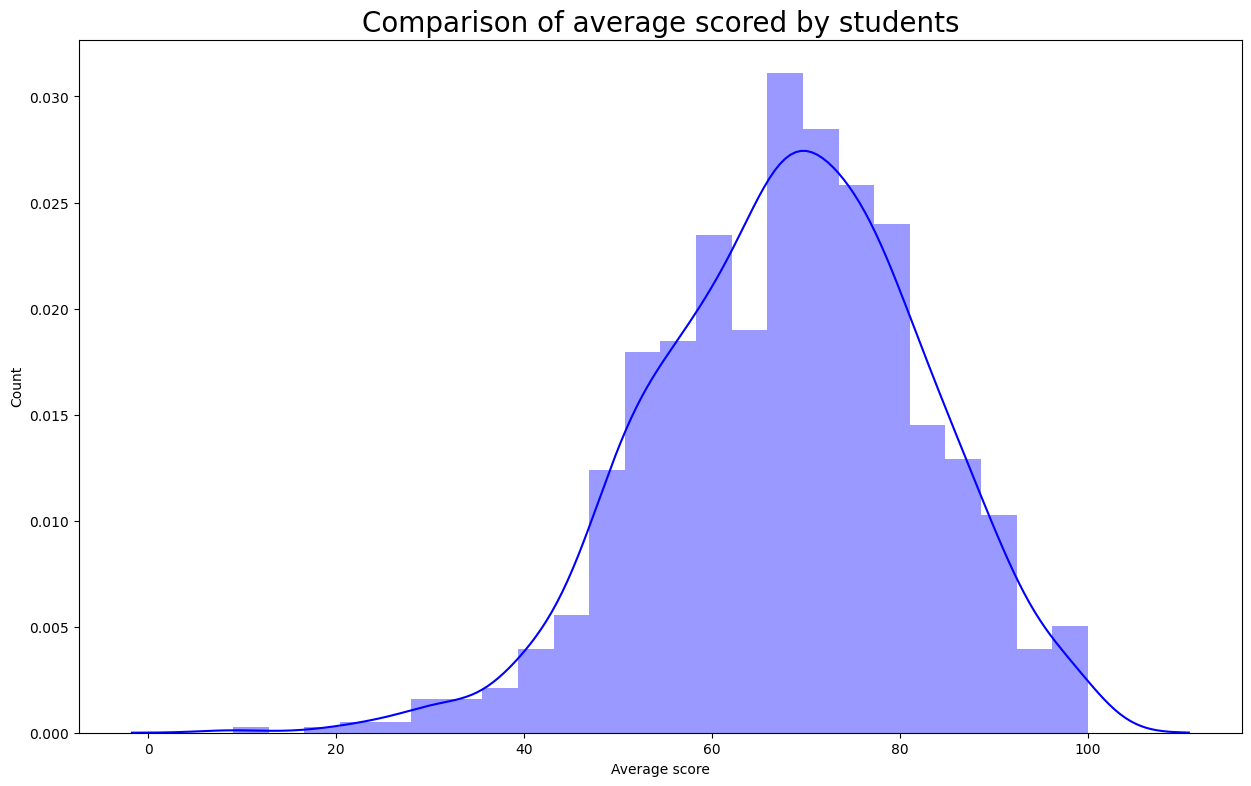

In [20]:
#math to use ceil function
from math import * 
import warnings
warnings.filterwarnings('ignore')

#let's compute a total score and an average score
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['average'] = data['total_score']/3

for i in range(0, 1000):
    data['average'][i] = ceil(data['average'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['average'], color = 'blue')

plt.title('Comparison of average scored by students', fontweight = 30, fontsize = 20)
plt.xlabel('Average score')
plt.ylabel('Count')
plt.show()

### Label encoding
We need to turn our categorical values into numeric values for our classifiers, so we do some basic label encoding on gender, race/ethnicity, parent's level of education, lunch and test preparation course.

In [49]:
from sklearn import preprocessing

X = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'average']].values

le_gen = preprocessing.LabelEncoder()
le_gen.fit(['female','male'])
X[:,0] = le_gen.transform(X[:,0])

le_race = preprocessing.LabelEncoder()
le_race.fit(['group A', 'group B', 'group C', 'group D', 'group E'])
X[:,1] = le_race.transform(X[:,1])

le_ple = preprocessing.LabelEncoder()
le_ple.fit(["bachelor's degree", "some college", "master's degree", "associate's degree", "high school", "some high school"])
X[:,2] = le_ple.transform(X[:,2])

le_lun = preprocessing.LabelEncoder()
le_lun.fit(["free/reduced", "standard"])
X[:,3] = le_lun.transform(X[:,3])

le_test=preprocessing.LabelEncoder()
le_test.fit(['none', 'completed'])
X[:,4] = le_test.transform(X[:,4])

In [50]:
#We assign X to be every categorical column but average score and Y to be our average score
Y = X[:,5]
X = X[:,:5]

## Setting up the model - Logistic Regression
We now have an array X consisting of the categorical values and we want to apply a logistic regression model to see if we can predict whether the examinee will pass or fail the exam based on their average result. We will considered passed those with average >= 60.

In [62]:
passed = []
for i in range(len(Y)):
    if Y[i] >= 60:
        passed.append(1)
    elif Y[i] < 60:
        passed.append(0)

Y=passed

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1234)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Let's create a LogisticRegression item and fit it on our train set
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

In [84]:
#We can predict the outcome of our test set
yhat = LR.predict(x_test)
print("Training Accuracy :", LR.score(x_train, y_train))
print("Testing Accuracy :", LR.score(x_test, y_test))

Training Accuracy : 0.7333333333333333
Testing Accuracy : 0.712


### Model Evaluation - Logistic Regression

In [75]:
from sklearn.metrics import jaccard_score
#Let's calculate the jaccard score index for our model
jaccard_score(y_test, yhat,pos_label=0)

0.02702702702702703

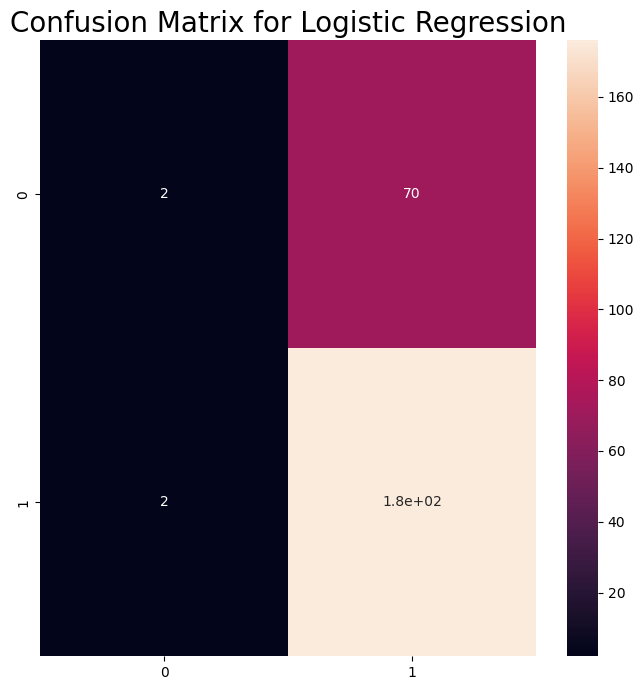

In [78]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, yhat)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [79]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        72
           1       0.72      0.99      0.83       178

    accuracy                           0.71       250
   macro avg       0.61      0.51      0.44       250
weighted avg       0.65      0.71      0.61       250



In [81]:
from sklearn.metrics import log_loss
#We first need to define the estimates for all classes ordered by label
yhat_prob = LR.predict_proba(x_test)
log_loss(y_test, yhat_prob)

0.5568581819059657

As we can see, our model is very good at predicting true positives, but is very bad at predicting true negatives.

## Setting up the model - Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
RF = RandomForestClassifier()

# feeding the training data to the model
RF.fit(x_train, y_train)

# predicting the x-test results
yhat = RF.predict(x_test)
print("Training Accuracy :", RF.score(x_train, y_train))
print("Testing Accuracy :", RF.score(x_test, y_test))

Training Accuracy : 0.7906666666666666
Testing Accuracy : 0.744


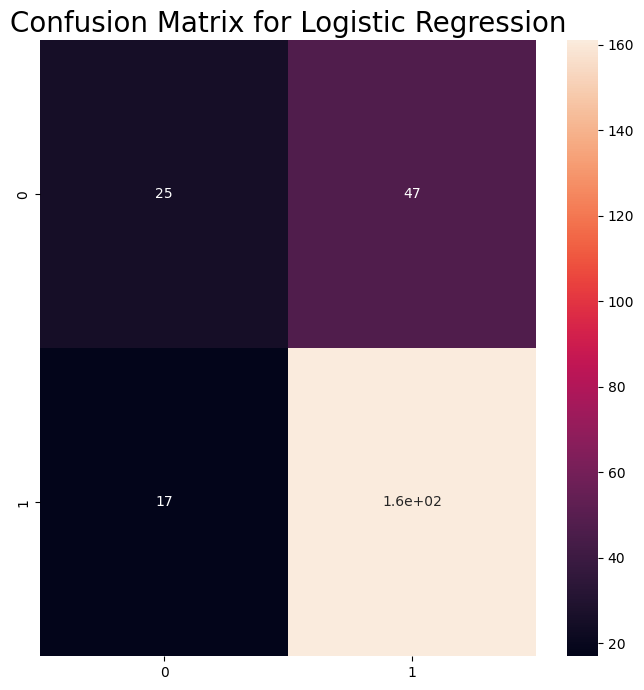

In [86]:
# creating a confusion matrix
cm = confusion_matrix(y_test, yhat)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [87]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44        72
           1       0.77      0.90      0.83       178

    accuracy                           0.74       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.72      0.74      0.72       250



In this case, we can see the model performs marginally better. 